# Практическое занятие №2 — Исследовательский анализ данных (EDA) и визуализация зависимостей

**Дисциплина:** Машинное обучение (Machine Learning)  
**Уровень:** Практикум / Базовый  
**Автор:** Осинцев Артем Викторович

---

## 1. Введение в EDA (Exploratory Data Analysis)
Исследовательский анализ данных — это критический этап перед построением моделей. По оценкам индустрии, до 80% времени проекта уходит на подготовку и понимание данных. Цель EDA — не просто построить графики, а сформулировать гипотезы, обнаружить аномалии и понять структуру данных.

**Ключевые вопросы EDA:**
1.  **Качество данных:** Есть ли пропуски? Есть ли выбросы?
2.  **Распределения:** Нормальное ли распределение у признаков? Есть ли перекос (skewness)?
3.  **Зависимости:** Какие признаки коррелируют с целевой переменной? Есть ли мультиколлинеарность?
4.  **Типы данных:** Какие признаки категориальные, какие численные?

> **Академическое замечание:** Всегда документируйте свои шаги. Ноутбук должен быть рассказом (storytelling) о данных, а не просто набором кода.












---

## 2. Теоретический базис методов

### 2.1. Пропущенные значения (Missing Values)
*   **MCAR (Missing Completely At Random):** Пропуск не зависит ни от чего.
*   **MAR (Missing At Random):** Пропуск зависит от других наблюдаемых переменных.
*   **MNAR (Missing Not At Random):** Пропуск зависит от самого пропущенного значения.
*   **Стратегии заполнения:**
    *   *Среднее (Mean):* Для нормальных распределений. Чувствительно к выбросам.
    *   *Медиана (Median):* Для распределений с выбросами.
    *   *Мода (Mode):* Для категориальных данных.

### 2.2. Выбросы (Outliers)
*   **IQR (Interquartile Range):** Метод межквартильного размаха. Выбросы за пределами $[Q1 - 1.5 \cdot IQR, Q3 + 1.5 \cdot IQR]$. Не требует предположения о нормальности.
*   **Z-Score:** Количество стандартных отклонений от среднего. Обычно порог $|Z| > 3$. Работает хорошо для нормальных распределений.

### 2.3. Преобразование признаков
*   **Логарифмирование:** Уменьшает правосторонний перекос (right skew).
*   **Нормализация (MinMax):** Приводит к диапазону $[0, 1]$.
*   **Стандартизация (Z-score):** Приводит к $\mu=0, \sigma=1$.

---

## 3. Практическая демонстрация

В данном примере мы используем датасет **California Housing** (из библиотеки `sklearn`). Поскольку он достаточно чистый, мы **искусственно создадим** пропуски и категориальные признаки, чтобы продемонстрировать все требуемые методы анализа.

> **Инструкция:** Скопируйте код по очереди в ячейки Jupyter Notebook в Google Colab.

### Блок 1: Подготовка данных и имитация проблем

## Какую проблему решаем
> Проблема: Реальные данные редко бывают идеальными. Этот блок создаёт контролируемую учебную среду с известными проблемами (пропуски, выбросы, категории), чтобы мы могли отработать методы их обнаружения и обработки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno  # Библиотека для визуализации пропусков

# Установка библиотеки missingno для Colab
!pip install missingno -q

# Загрузка данных
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

# --- Имитация проблем для учебных целей ---
np.random.seed(42)

# 1. Создаем пропуски (5% случайно)
missing_cols = ['AveRooms', 'AveBedrms', 'Population']
for col in missing_cols:
    mask = np.random.choice([True, False], size=len(df), p=[0.05, 0.95])
    df.loc[mask, col] = np.nan

# 2. Создаем категориальный признак (возраст дома)
df['HouseAgeCat'] = pd.cut(df['HouseAge'], bins=[0, 10, 30, 50, 100], labels=['New', 'Medium', 'Old', 'VeryOld'])

# 3. Создаем выбросы в целевой переменной
df.loc[np.random.choice(df.index, 10), 'Target'] = df['Target'].max() * 5

print(f"Размер датасета: {df.shape}")
print(f"Пропуски:\n{df.isnull().sum()}")

Размер датасета: (20640, 10)
Пропуски:
MedInc            0
HouseAge          0
AveRooms       1018
AveBedrms      1023
Population     1034
AveOccup          0
Latitude          0
Longitude         0
Target            0
HouseAgeCat       0
dtype: int64


### Блок 2: Визуализация пропусков и заполнение

## Какую проблему решаем
>Проблема: Большинство алгоритмов ML не работают с пропусками. Неправильное заполнение может внести смещение (Bias) в модель. Мы выбираем медиану, потому что она минимизирует влияние выбросов на оценку центральной тенденции, что соответствует принципу робастности из теории вероятностей.

<Figure size 1000x500 with 0 Axes>

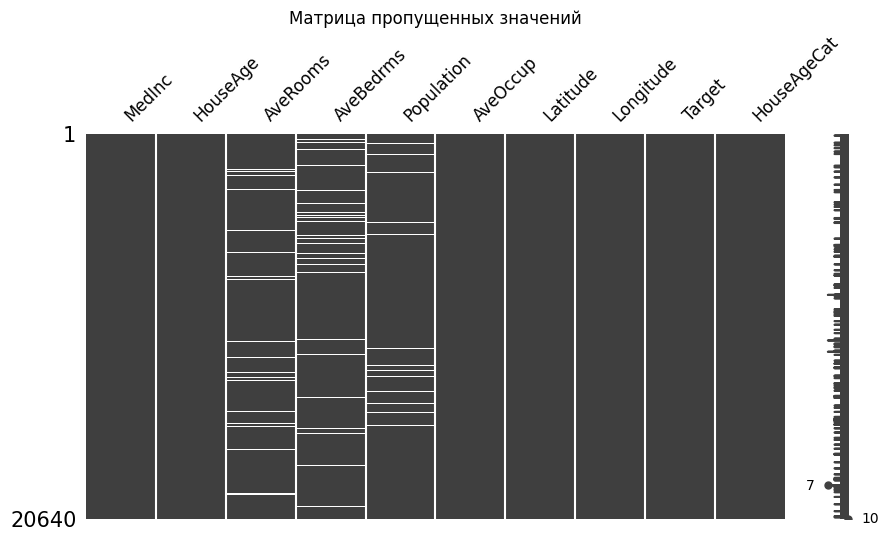

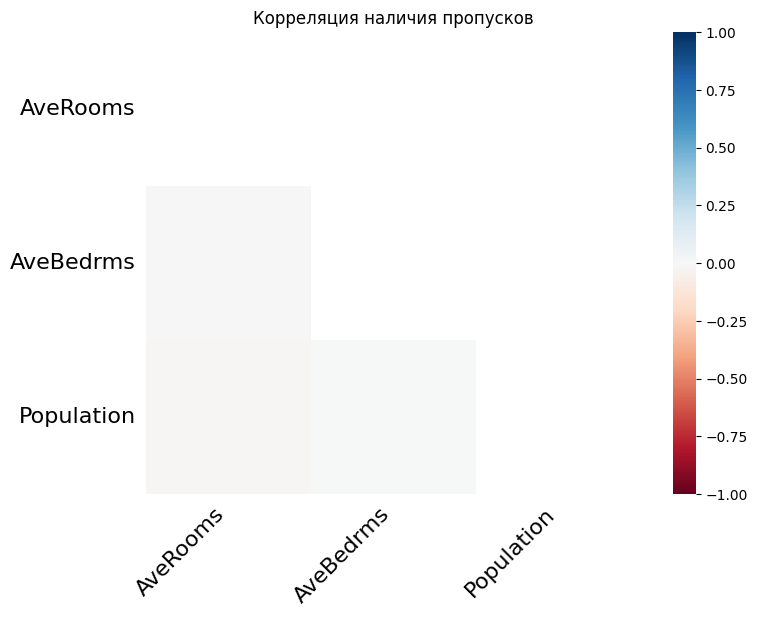

Пропуски после заполнения: 0


/tmp/ipython-input-1070/4090666663.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [2]:
# Визуализация паттернов пропусков
plt.figure(figsize=(10, 5))
msno.matrix(df, figsize=(10, 5), fontsize=12)
plt.title("Матрица пропущенных значений")
plt.show()

msno.heatmap(df, figsize=(8, 6))
plt.title("Корреляция наличия пропусков")
plt.show()

# Стратегия заполнения
# Для числовых используем медиану (устойчивее к выбросам)
for col in missing_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("Пропуски после заполнения:", df.isnull().sum().sum())


### Блок 3: Корреляция и Мультиколлинеарность

##Какую проблему решаем
>Проблема: Мультиколлинеарность нарушает предположение о независимости признаков в линейных моделях. Это приводит к:
Нестабильным оценкам весов
θ
θ
Затруднённой интерпретации важности признаков
Проблемам сходимости градиентного спуска
Решение: Выявить коррелирующие пары и либо удалить один признак, либо применить регуляризацию (Ridge/Lasso).

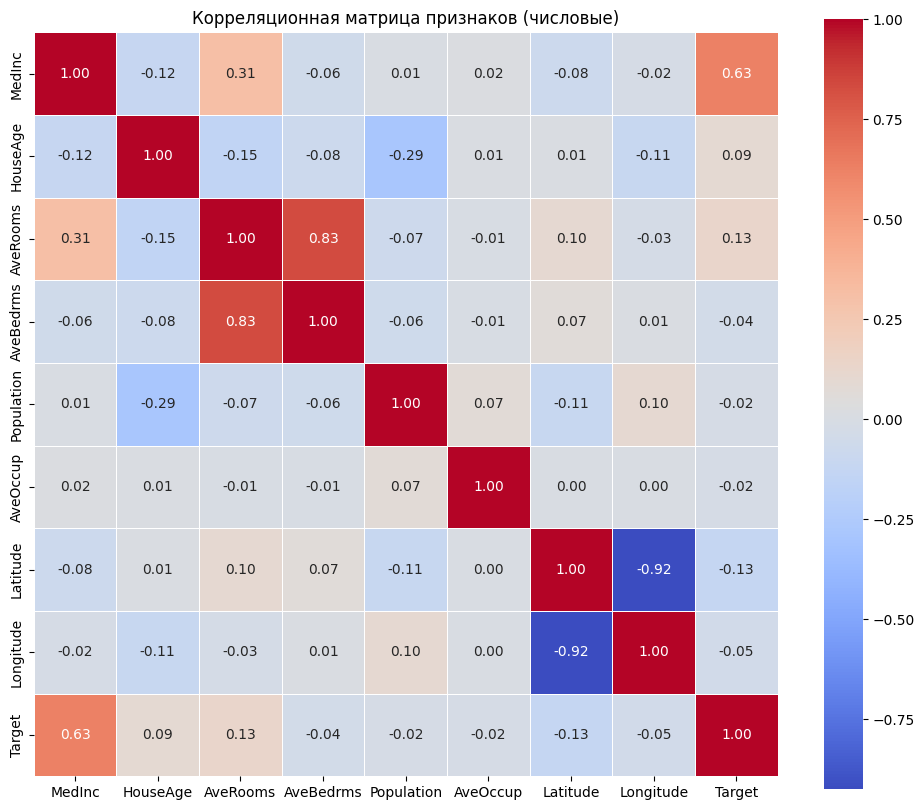

Пары с высокой корреляцией (>0.8):
AveBedrms & AveRooms: 0.83
Longitude & Latitude: -0.92


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Решение 1: Выбрать только числовые колонки ---
plt.figure(figsize=(12, 10))

# Фильтруем только числовые столбцы
df_numeric = df.select_dtypes(include=[np.number])

# Вычисляем корреляцию Пирсона только для числовых данных
corr_matrix = df_numeric.corr()

# Тепловая карта
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Корреляционная матрица признаков (числовые)")
plt.show()

# --- Анализ мультиколлинеарности (пары с корреляцией > 0.8) ---
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("Пары с высокой корреляцией (>0.8):")
for pair in high_corr:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")

if not high_corr:
    print("Пар с корреляцией > 0.8 не обнаружено")

##Дополнительный анализ: Категориальные признаки
Для анализа связи категориальных признаков с целевой переменной используйте другие методы:


Категориальные признаки: ['HouseAgeCat']


/tmp/ipython-input-1070/1684619794.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)['Target'].mean().plot(kind='bar', color='skyblue')


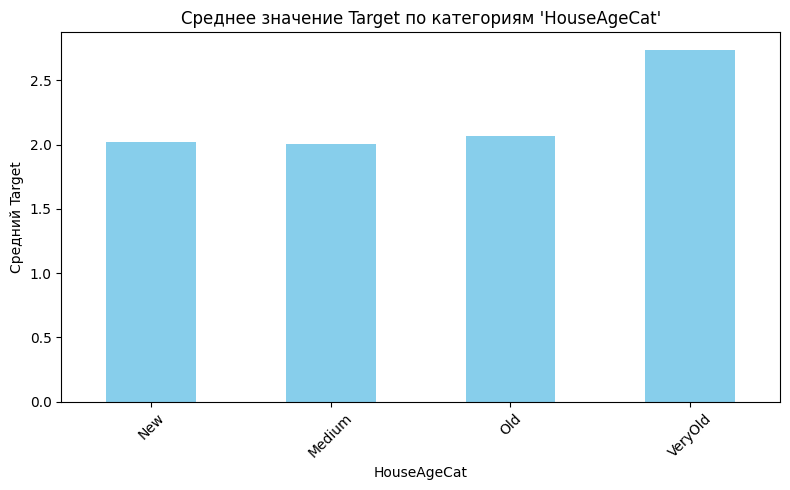

ANOVA для 'HouseAgeCat': F=134.36, p-value=0.0000
Признак 'HouseAgeCat' статистически значимо влияет на Target
--------------------------------------------------


/tmp/ipython-input-1070/1684619794.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Target'].values for name, group in df.groupby(col)]


In [4]:
# --- Решение 2: Анализ категориальных признаков через ANOVA / Chi-Square ---
from scipy import stats

# Если есть категориальные признаки
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    print(f"\nКатегориальные признаки: {list(categorical_cols)}")

    # Для каждой категории считаем среднее значение Target
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        df.groupby(col)['Target'].mean().plot(kind='bar', color='skyblue')
        plt.title(f"Среднее значение Target по категориям '{col}'")
        plt.xlabel(col)
        plt.ylabel("Средний Target")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Статистический тест (ANOVA для числового таргета)
        groups = [group['Target'].values for name, group in df.groupby(col)]
        if len(groups) >= 2:
            f_stat, p_value = stats.f_oneway(*groups)
            print(f"ANOVA для '{col}': F={f_stat:.2f}, p-value={p_value:.4f}")
            if p_value < 0.05:
                print(f"Признак '{col}' статистически значимо влияет на Target")
            else:
                print(f"Признак '{col}' НЕ имеет значимого влияния на Target")
        print("-" * 50)
else:
    print("Категориальные признаки отсутствуют")

## 📋 Справочная таблица: Методы корреляции

| Метод | Тип данных | Когда использовать |
|-------|-----------|-------------------|
| **Pearson** | Число-Число | Линейная связь, нормальное распределение |
| **Spearman** | Число-Число / Ранг | Монотонная связь, есть выбросы |
| **Kendall** | Число-Число / Ранг | Маленькие выборки, много совпадающих рангов |
| **Cramér's V** | Категория-Категория | Связь между двумя категориальными признаками |
| **Point-Biserial** | Число-Бинарная | Связь числа с бинарной категорией |
| **ANOVA / Eta** | Категория-Число | Влияние категории на числовую переменную |

---





## 🎯 Дополнительные задания для понимания

### Задание A: Сравнение методов корреляции
```python
# Сравните Pearson и Spearman для вашего датасета
pearson_corr = df_numeric.corr(method='pearson')
spearman_corr = df_numeric.corr(method='spearman')

# Найдите различия
diff = np.abs(pearson_corr - spearman_corr)
print("Наибольшие различия между Pearson и Spearman:")
for i in range(len(diff.columns)):
    for j in range(i):
        if diff.iloc[i, j] > 0.1:
            print(f"{diff.columns[i]} & {diff.columns[j]}: {diff.iloc[i, j]:.2f}")
```

### Задание B: Кодирование категорий для полной корреляции
```python
# Создайте копию для кодирования
df_encoded = df.copy()

# One-Hot Encoding для категориальных признаков
df_encoded = pd.get_dummies(df_encoded, columns=['HouseAgeCat'], drop_first=True)

# Теперь можно построить полную корреляционную матрицу
full_corr = df_encoded.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(full_corr, annot=False, cmap='coolwarm', square=True)
plt.title("Полная корреляционная матрица (после One-Hot Encoding)")
plt.show()
```

### Задание C: VIF (Variance Inflation Factor) для мультиколлинеарности
```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF для проверки мультиколлинеарности
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i)
                   for i in range(len(df_numeric.columns))]

print(vif_data.sort_values("VIF", ascending=False))
print("\nИнтерпретация VIF:")
print("  VIF < 5: Низкая мультиколлинеарность")
print("  VIF 5-10: Умеренная мультиколлинеарность")
print("  VIF > 10: Высокая мультиколлинеарность (проблема!)")
```

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno

# Установка библиотеки missingno для Colab
!pip install missingno -q

# Загрузка данных
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

# --- Имитация проблем для учебных целей ---
np.random.seed(42)

# 1. Создаем пропуски (5% случайно)
missing_cols = ['AveRooms', 'AveBedrms', 'Population']
for col in missing_cols:
    mask = np.random.choice([True, False], size=len(df), p=[0.05, 0.95])
    df.loc[mask, col] = np.nan

# 2. Создаем категориальный признак (возраст дома)
df['HouseAgeCat'] = pd.cut(df['HouseAge'],
                           bins=[0, 10, 30, 50, 100],
                           labels=['New', 'Medium', 'Old', 'VeryOld'])
# Важно: это категориальная колонка, не числовая!

# 3. Создаем выбросы в целевой переменной
df.loc[np.random.choice(df.index, 10), 'Target'] = df['Target'].max() * 5

print(f"Размер датасета: {df.shape}")
print(f"\nТипы данных:\n{df.dtypes}")
print(f"\nПропуски:\n{df.isnull().sum()}")

Размер датасета: (20640, 10)

Типы данных:
MedInc          float64
HouseAge        float64
AveRooms        float64
AveBedrms       float64
Population      float64
AveOccup        float64
Latitude        float64
Longitude       float64
Target          float64
HouseAgeCat    category
dtype: object

Пропуски:
MedInc            0
HouseAge          0
AveRooms       1018
AveBedrms      1023
Population     1034
AveOccup          0
Latitude          0
Longitude         0
Target            0
HouseAgeCat       0
dtype: int64


### Блок 4: Категориальные признаки и Pairplot

## Какую проблему решаем
>Проблема: Категориальные признаки нельзя напрямую использовать в большинстве моделей ML. Нужно понять:
Влияет ли категория на Target? (если нет — можно удалить)
Есть ли баланс классов? (дисбаланс требует специальных техник)
Как кодировать? (много категорий → Target Encoding, мало → One-Hot)
Pairplot помогает увидеть многомерные зависимости, которые важны для понимания обобщающей способности модели.

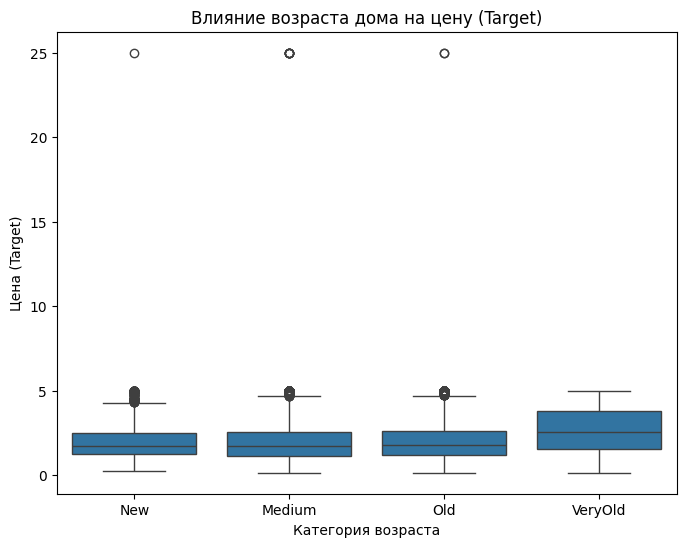

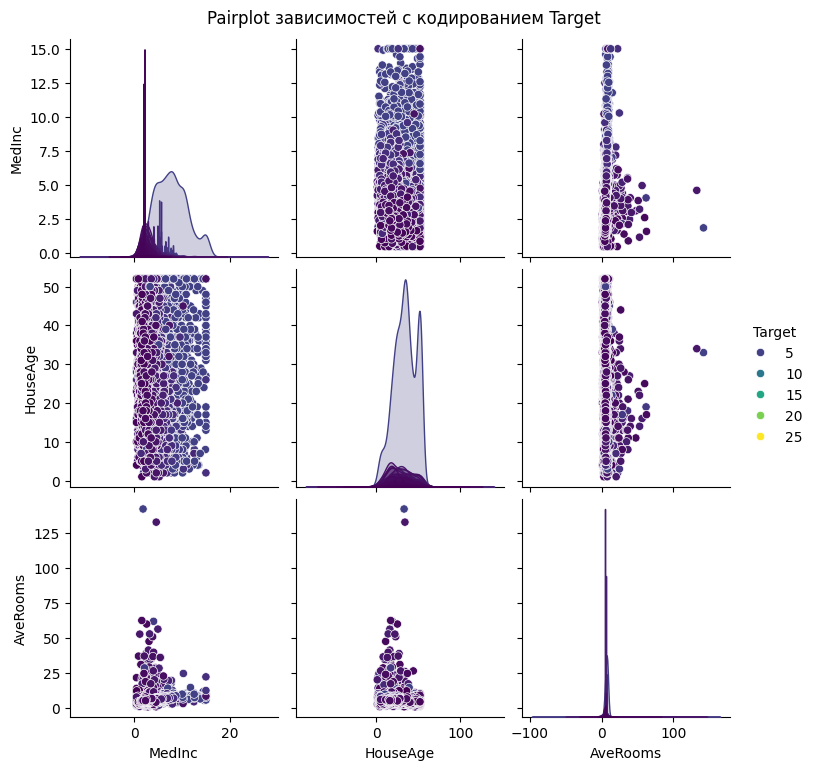

In [6]:
# Анализ влияния категории на целевую переменную
plt.figure(figsize=(8, 6))
sns.boxplot(x='HouseAgeCat', y='Target', data=df)
plt.title("Влияние возраста дома на цену (Target)")
plt.xlabel("Категория возраста")
plt.ylabel("Цена (Target)")
plt.show()

# Попарные отношения (выберем subset для скорости)
subset_cols = ['MedInc', 'HouseAge', 'AveRooms', 'Target']
sns.pairplot(df[subset_cols], hue='Target', palette='viridis', height=2.5)
plt.suptitle("Pairplot зависимостей с кодированием Target", y=1.02)
plt.show()

### Блок 5: Обнаружение выбросов (IQR и Z-Score)

##Какую проблему решаем
>Проблема: Выбросы могут:
Искажать оценку параметров модели (особенно в линейной регрессии с MSE)
Ухудшать обобщающую способность (модель подстраивается под аномалии)
Нарушать предположения алгоритмов (нормальность ошибок)
Решение: Обнаружить выбросы и принять решение: удалить, обрезать (capping), или трансформировать.

Выбросы в 'Target':
IQR метод: 1079
Z-Score метод: 10


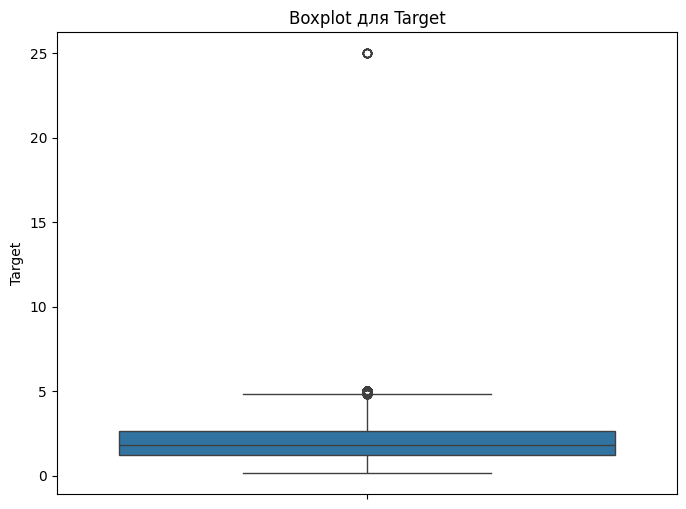

In [7]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return len(outliers)

def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = np.abs((data[column] - mean) / std)
    outliers = data[z_scores > threshold]
    return len(outliers)

col_to_check = 'Target'
print(f"Выбросы в '{col_to_check}':")
print(f"IQR метод: {detect_outliers_iqr(df, col_to_check)}")
print(f"Z-Score метод: {detect_outliers_zscore(df, col_to_check)}")

# Визуализация Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[col_to_check])
plt.title(f"Boxplot для {col_to_check}")
plt.show()

### Блок 6: Преобразование признаков и Нормализация

##Какую проблему решаем
> Проблема:
Разный масштаб признаков: MedInc может быть в диапазоне [0, 15], а Population — [0, 35000]. Градиентный спуск будет сходиться медленно.
Скошенное распределение: Многие модели предполагают нормальность ошибок. Логарифмирование улучшает соответствие этому предположению.
Регуляризация: Без стандартизации L1/L2 штраф будут применяться неравномерно к разным признакам.
Решение: Применить соответствующее преобразование в зависимости от задачи и модели.

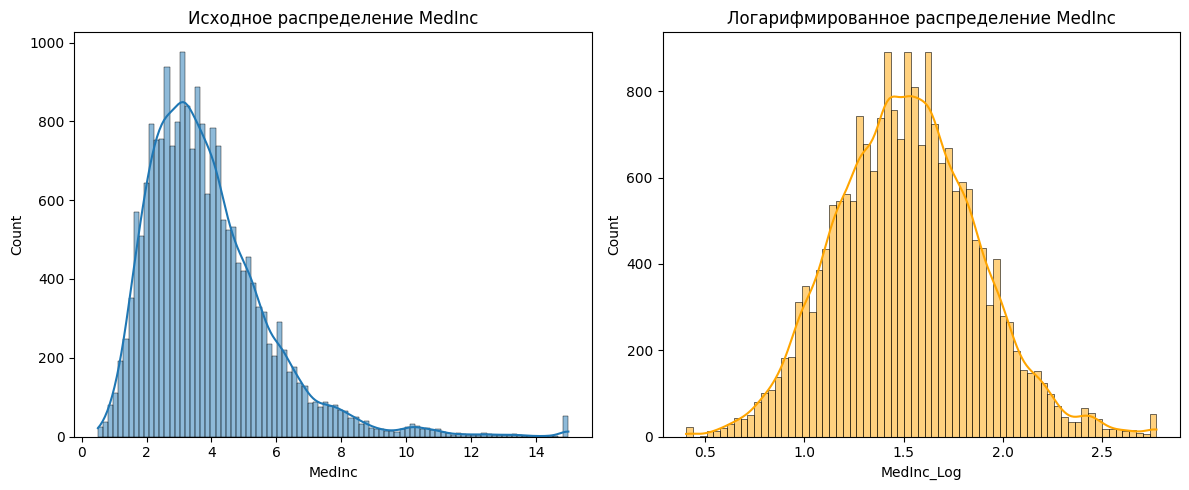

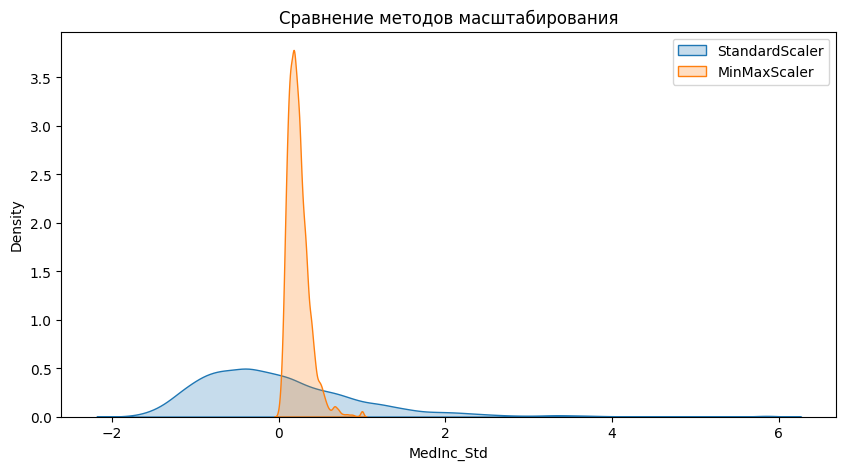

In [8]:
# Проверка распределения до преобразования
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['MedInc'], kde=True)
plt.title("Исходное распределение MedInc")

# Логарифмирование (если есть перекос)
df['MedInc_Log'] = np.log1p(df['MedInc'])

plt.subplot(1, 2, 2)
sns.histplot(df['MedInc_Log'], kde=True, color='orange')
plt.title("Логарифмированное распределение MedInc")
plt.tight_layout()
plt.show()

# Сравнение нормализации (Standard vs MinMax)
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df['MedInc_Std'] = scaler_std.fit_transform(df[['MedInc']])
df['MedInc_MinMax'] = scaler_minmax.fit_transform(df[['MedInc']])

plt.figure(figsize=(10, 5))
sns.kdeplot(df['MedInc_Std'], label='StandardScaler', fill=True)
sns.kdeplot(df['MedInc_MinMax'], label='MinMaxScaler', fill=True)
plt.title("Сравнение методов масштабирования")
plt.legend()
plt.show()

---
### Блок 7: Формирование гипотез (Пример отчета)

## Какую проблему решаем
>Проблема: Анализ без выводов бесполезен. Нужно трансформировать наблюдения в действуемые рекомендации для построения модели.
Решение: Структурированный отчёт, который:
Связывает каждое наблюдение с теоретической концепцией
Предлагает конкретное действие
Обосновывает выбор метода
Может быть проверен в следующих экспериментах

In [9]:
# Пример текстового вывода гипотез в ноутбуке
hypotheses = """
## Отчет по EDA и гипотезы

1. **Пропуски:** Данные имели случайные пропуски (MCAR). Заполнение медианой выбрано из-за наличия выбросов.
2. **Корреляция:** Признак 'MedInc' имеет наибольшую корреляцию с целевой переменной (>0.6).
   Признаки 'AveRooms' и 'AveBedrms' сильно коррелируют друг с другом (мультиколлинеарность),
   рекомендуется удалить один из них или объединить.
3. **Выбросы:** В целевой переменной обнаружены аномалии. Рекомендуется удалить объекты с Z-score > 3.
4. **Распределение:** 'MedInc' имеет правосторонний перекос. Логарифмирование улучшило нормальность распределения.
5. **Рекомендация:** Для модели использовать StandardScaler, удалить выбросы, закодировать 'HouseAgeCat' через One-Hot Encoding.
"""
print(hypotheses)


## Отчет по EDA и гипотезы

1. **Пропуски:** Данные имели случайные пропуски (MCAR). Заполнение медианой выбрано из-за наличия выбросов.
2. **Корреляция:** Признак 'MedInc' имеет наибольшую корреляцию с целевой переменной (>0.6).
   Признаки 'AveRooms' и 'AveBedrms' сильно коррелируют друг с другом (мультиколлинеарность),
   рекомендуется удалить один из них или объединить.
3. **Выбросы:** В целевой переменной обнаружены аномалии. Рекомендуется удалить объекты с Z-score > 3.
4. **Распределение:** 'MedInc' имеет правосторонний перекос. Логарифмирование улучшило нормальность распределения.
5. **Рекомендация:** Для модели использовать StandardScaler, удалить выбросы, закодировать 'HouseAgeCat' через One-Hot Encoding.



## 4. Варианты заданий для самостоятельного решения

Каждый студент получает уникальный **Вариант задания**. Вариант определяется по номеру студента в списке группы.

**Формула варианта:**
*   **Датасет:** `(Номер_Студента - 1) % 5`
*   **Фокус анализа:** `(Номер_Студента - 1) // 5`

### Таблица вариантов

| № Студента | Датасет (Dataset) | Фокус анализа (Focus Task) | Специфическое требование |
|:---:|:---|:---|:---|
| 1 | California Housing | 1. Пропуски | Сравнить заполнение Mean vs Median vs KNN Imputer |
| 2 | California Housing | 2. Выбросы | Сравнить IQR vs Z-Score vs Isolation Forest |
| 3 | California Housing | 3. Трансформация | Log vs Box-Cox vs Yeo-Johnson |
| 4 | California Housing | 4. Корреляция | Pearson vs Spearman vs Kendall |
| 5 | California Housing | 5. Категории | Биннинг непрерывных признаков + Target Encoding |
| 6 | Titanic | 1. Пропуски | Анализ пропусков в 'Age' и 'Cabin' (MAR vs MCAR) |
| 7 | Titanic | 2. Выбросы | Анализ выбросов в 'Fare' и 'Age' |
| 8 | Titanic | 3. Трансформация | Трансформация 'Fare' (логарифм) |
| 9 | Titanic | 4. Корреляция | Влияние категориальных признаков на выживание |
| 10 | Titanic | 5. Категории | Анализ влияния 'Embarked' и 'Pclass' |
| 11 | Wine Quality (Red) | 1. Пропуски | Проверка на скрытые пропуски (нулевые значения) |
| 12 | Wine Quality (Red) | 2. Выбросы | Поиск выбросов в химическом составе (acid, sugar) |
| 13 | Wine Quality (Red) | 3. Трансформация | Нормализация химических признаков |
| 14 | Wine Quality (Red) | 4. Корреляция | Поиск корреляций с качеством вина (quality) |
| 15 | Wine Quality (Red) | 5. Категории | Превратить 'quality' в бинарный класс (Good/Bad) |
| 16 | Diamonds | 1. Пропуски | Поиск нулевых значений в 'x', 'y', 'z' |
| 17 | Diamonds | 2. Выбросы | Выбросы в цене и каратах (0 карат?) |
| 18 | Diamonds | 3. Трансформация | Логарифмирование цены |
| 19 | Diamonds | 4. Корреляция | Влияние качества огранки (Cut) на цену |
| 20 | Diamonds | 5. Категории | One-Hot Encoding для Cut, Color, Clarity |
| 21 | Adult Income | 1. Пропуски | Обработка пропусков обозначенных как '?' |
| 22 | Adult Income | 2. Выбросы | Анализ выбросов в 'capital-gain' |
| 23 | Adult Income | 3. Трансформация | Масштабирование числовых признаков |
| 24 | Adult Income | 4. Корреляция | Корреляция образования и дохода |
| 25 | Adult Income | 5. Категории | Группировка редких категорий в 'Native-country' |

**Источники данных:**
1.  *California Housing:* `sklearn.datasets.fetch_california_housing`
2.  *Titanic:* `seaborn.load_dataset('titanic')`
3.  *Wine Quality:* UCI Repository (Red Wine)
4.  *Diamonds:* `seaborn.load_dataset('diamonds')`
5.  *Adult Income:* UCI Repository (Census Income)

---

## 5. Задания для самостоятельного решения

Каждый студент выполняет эти три задания в рамках своего **Уникального Варианта**.

### Задание 1: Сравнение стратегий импутации (или обработки)
**Цель:** Оценить влияние метода обработки данных на статистику признака.
**Инструкция:**
1.  Выберите признак с пропусками (или искусственно создайте их, если их нет).
2.  Заполните пропуски двумя разными способами (например, Среднее vs Медиана, или Удаление строк vs Заполнение).
3.  Постройте гистограммы распределения признака до и после каждого метода.
4.  Рассчитайте, как изменилось среднее и стандартное отклонение.
5.  **Вывод:** Какой метод меньше исказил исходное распределение?

> **Подсказка:** Используйте `df.describe()` до и после операций. Для продвинутых: попробуйте `IterativeImputer` из `sklearn.impute`.

### Задание 2: Детекция и визуализация выбросов
**Цель:** Научиться находить и аргументированно удалять аномалии.
**Инструкция:**
1.  Выберите числовой признак, наиболее важный для вашей задачи (по корреляции с таргетом).
2.  Найдите выбросы методом IQR и методом Z-Score.
3.  Визуализуйте их на Boxplot и Scatterplot (подсветите выбросы красным цветом).
4.  Посчитайте процент выбросов от общего числа данных.
5.  **Вывод:** Стоит ли удалять эти строки или они содержат ценную информацию (например, дорогие дома или редкие случаи болезни)?

> **Подсказка:** Если выбросов > 5%, удаление может привести к потере информации. Рассмотрите возможность "обрезки" (capping) значений вместо удаления.

### Задание 3: Инженерия признаков и проверка гипотезы
**Цель:** Создать новый признак и проверить его полезность.
**Инструкция:**
1.  Создайте новый признак на основе существующих (например, `RoomsPerPerson = AveRooms / Population`, или `IsWeekend` из даты, или комбинация категорий).
2.  Постройте корреляционную матрицу с включением нового признака.
3.  Постройте график зависимости нового признака от целевой переменной.
4.  **Вывод:** Увеличил ли новый признак корреляцию с целевой переменной по сравнению с исходными? Рекомендуете ли вы его для модели?

> **Подсказка:** Хороший признак должен иметь физический смысл. Избегайте "мусорных" комбинаций.

Скомпилировать перед решением заданий:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats

# Загрузка датасета diamonds
df = sns.load_dataset('diamonds')
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
df.head()

print(df.info())
print("\nОписательная статистика:")
df.describe()

Размер датасета: (53940, 10)

Первые 5 строк:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None

Описательная статистика:


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Задание 1. Решение:

Пропусков в 'depth': 2686


/tmp/ipython-input-1070/2288296376.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean[col].fillna(mean_val, inplace=True)
/tmp/ipython-input-1070/2288296376.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

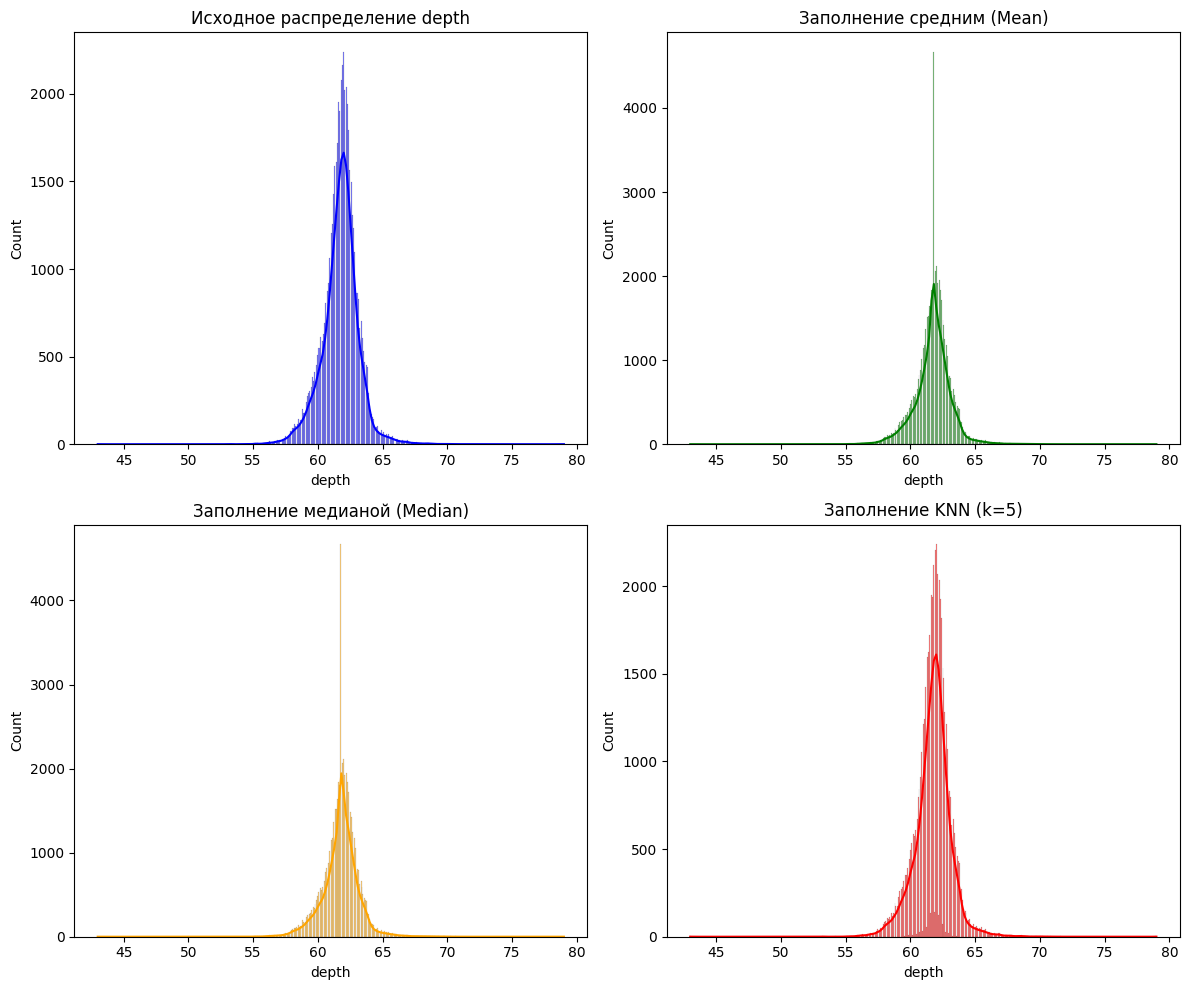

      Метод    Среднее  Стд. отклонение
0  Исходные  61.749405         1.432621
1      Mean  61.750732         1.394769
2    Median  61.753185         1.394810
3       KNN  61.752278         1.403004


In [11]:
np.random.seed(42)
df1 = df.copy()
col = 'depth'
mask = np.random.choice([True, False], size=len(df1), p=[0.05, 0.95])
df1.loc[mask, col] = np.nan
print(f"Пропусков в '{col}': {df1[col].isnull().sum()}")

# Среднее
mean_val = df1[col].mean()
df_mean = df1.copy()
df_mean[col].fillna(mean_val, inplace=True)

# Медиана
median_val = df1[col].median()
df_median = df1.copy()
df_median[col].fillna(median_val, inplace=True)

# KNN Imputer (только числовые признаки)
num_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
imputer = KNNImputer(n_neighbors=5)
df_knn = df1.copy()
df_knn[num_cols] = imputer.fit_transform(df1[num_cols])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Исходное распределение (без пропусков)
sns.histplot(df[col], kde=True, ax=axes[0,0], color='blue')
axes[0,0].set_title(f"Исходное распределение {col}")

# После Mean
sns.histplot(df_mean[col], kde=True, ax=axes[0,1], color='green')
axes[0,1].set_title(f"Заполнение средним (Mean)")

# После Median
sns.histplot(df_median[col], kde=True, ax=axes[1,0], color='orange')
axes[1,0].set_title(f"Заполнение медианой (Median)")

# После KNN
sns.histplot(df_knn[col], kde=True, ax=axes[1,1], color='red')
axes[1,1].set_title(f"Заполнение KNN (k=5)")

plt.tight_layout()
plt.show()

stats_df = pd.DataFrame({
    'Метод': ['Исходные', 'Mean', 'Median', 'KNN'],
    'Среднее': [df[col].mean(), df_mean[col].mean(), df_median[col].mean(), df_knn[col].mean()],
    'Стд. отклонение': [df[col].std(), df_mean[col].std(), df_median[col].std(), df_knn[col].std()]
})
print(stats_df)

Задание 2. Решение:

IQR метод: найдено 3540 выбросов (6.56%)
Границы IQR: [-5611.38, 11885.62]
Z-Score метод (|z|>3): найдено 1206 выбросов (2.24%)


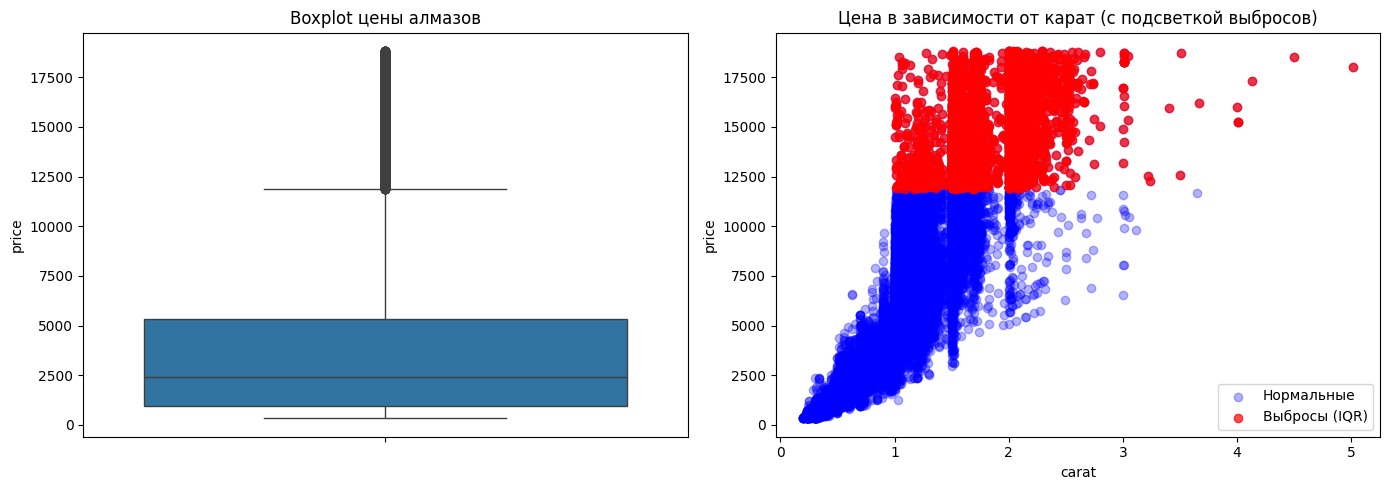

In [12]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = np.abs((data[column] - mean) / std)
    outliers = data[z_scores > threshold]
    return outliers, mean, std

col_price = 'price'

# IQR
outliers_iqr, low_iqr, up_iqr = detect_outliers_iqr(df, col_price)
print(f"IQR метод: найдено {len(outliers_iqr)} выбросов ({len(outliers_iqr)/len(df)*100:.2f}%)")
print(f"Границы IQR: [{low_iqr:.2f}, {up_iqr:.2f}]")

# Z-Score
outliers_z, mean_z, std_z = detect_outliers_zscore(df, col_price)
print(f"Z-Score метод (|z|>3): найдено {len(outliers_z)} выбросов ({len(outliers_z)/len(df)*100:.2f}%)")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
sns.boxplot(y=df[col_price], ax=axes[0])
axes[0].set_title(f"Boxplot цены алмазов")

# Scatterplot price vs carat с подсветкой выбросов (IQR)
axes[1].scatter(df['carat'], df['price'], c='blue', alpha=0.3, label='Нормальные')
axes[1].scatter(outliers_iqr['carat'], outliers_iqr['price'], c='red', alpha=0.7, label='Выбросы (IQR)')
axes[1].set_xlabel('carat')
axes[1].set_ylabel('price')
axes[1].set_title("Цена в зависимости от карат (с подсветкой выбросов)")
axes[1].legend()

plt.tight_layout()
plt.show()



Задание 3. Решение:

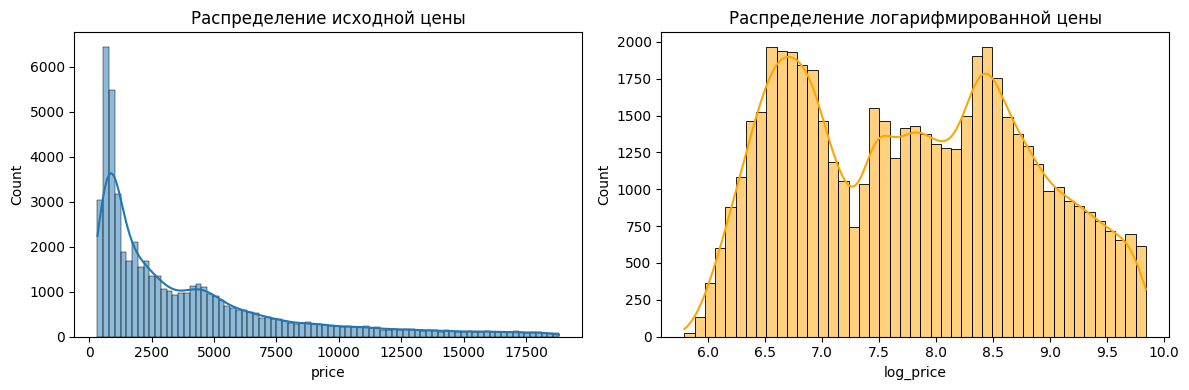

Корреляция Пирсона (price, carat): 0.9216
Корреляция Пирсона (log_price, carat): 0.9203


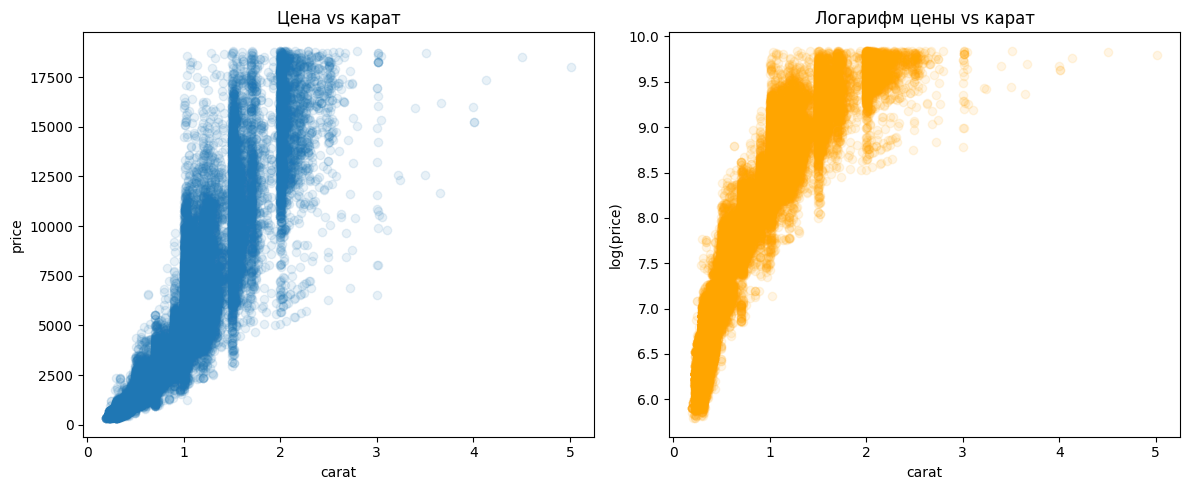

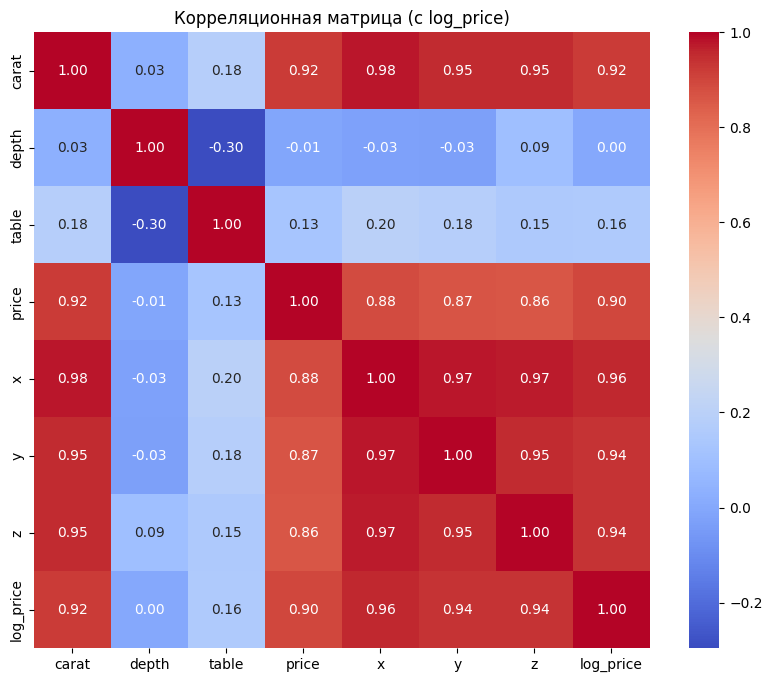

In [13]:
df['log_price'] = np.log1p(df['price'])  # log(1+price) для устойчивости к нулю
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title("Распределение исходной цены")

sns.histplot(df['log_price'], kde=True, ax=axes[1], color='orange')
axes[1].set_title("Распределение логарифмированной цены")

plt.tight_layout()
plt.show()

corr_price_carat = df['price'].corr(df['carat'])
corr_log_carat = df['log_price'].corr(df['carat'])

print(f"Корреляция Пирсона (price, carat): {corr_price_carat:.4f}")
print(f"Корреляция Пирсона (log_price, carat): {corr_log_carat:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['carat'], df['price'], alpha=0.1)
axes[0].set_xlabel('carat')
axes[0].set_ylabel('price')
axes[0].set_title("Цена vs карат")

axes[1].scatter(df['carat'], df['log_price'], alpha=0.1, color='orange')
axes[1].set_xlabel('carat')
axes[1].set_ylabel('log(price)')
axes[1].set_title("Логарифм цены vs карат")

plt.tight_layout()
plt.show()

# Выберем числовые признаки
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Корреляционная матрица (с log_price)")
plt.show()

---

## 6. Оформление отчета и академическая честность

Ваш итоговый ноутбук является академической работой. Соблюдение стандартов обязательно.

1.  **Структура ноутбука:**
    *   Заголовок и имя студента.
    *   Описание датасета (источник, количество строк/столбцов).
    *   Пошаговый анализ (код + текстовый комментарий под каждым графиком).
    *   Раздел "Выводы и гипотезы".
2.  **Цитирование (APA Style):**
    *   Если используете сторонние датасеты, указывайте автора/организацию.
    *   *Пример:* Dua, D., & Graff, C. (2017). *UCI Machine Learning Repository*. University of California, Irvine, School of Information and Computer Sciences.
    *   Библиотеки: Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. *JMLR*, 12, 2825-2830.
3.  **Уникальность:**
    *   Запрещено копировать код и тексты выводов у одногруппников.
    *   Система вариантов гарантирует, что ваши графики и цифры будут отличаться.
    *   Используйте систему контроля плагиата (например, сравнение хеш-сумм ноутбуков или ручную проверку выводов).

---

## 7. Заключение
Проведение качественного EDA — это навык, который отличает новичка от профессионала. Модель не может быть лучше, чем данные, на которых она обучена. В ходе этой практики вы научились не просто "строить графики", а задавать данные вопросы и искать на них ответы статистическими методами.

**Рекомендуемые материалы для углубления:**
1.  *Python for Data Analysis* by Wes McKinney (O'Reilly).
2.  *Feature Engineering and Selection* by Kuhn & Johnson (CRC Press).
3.  Документация `seaborn` и `pandas` (раздел Visualization).

Удачи в анализе! Помните: данные никогда не врут, но они могут молчать, если их неправильно спросить.